In [1]:
import seaborn as sns
import statistics
import pandas as pd

In [2]:
df_tips=sns.load_dataset('tips')
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df_tips['sex'].count()
#count() should be used when you want to find the frequency of valid values present in columns with respect to specified col

244

In [6]:
df_tips.shape

(244, 7)

In [8]:
df_tips['sex'].value_counts()#value_counts() should be used to find the frequencies of a series.

Male      157
Female     87
Name: sex, dtype: int64

In [29]:
#daywise male female count
df=pd.crosstab(index=df_tips['day'], columns=df_tips['sex'])
df

sex,Male,Female
day,,
Thur,30,32
Fri,10,9
Sat,59,28
Sun,58,18


In [31]:
#renaming column names
#df.rename({'Male':'meals served by males','Female':'meals served by females'},axis=1)

sex,meals served by males,meals served by females
day,,
Thur,30,32
Fri,10,9
Sat,59,28
Sun,58,18


In [51]:
#another methos for renaming
pd.crosstab(index=df_tips['day'], columns=df_tips['sex']).rename({'Male':'count_meals_served_by_males','Female':'count_meals_served_by_females'},axis=1)


sex,count_meals_served_by_males,count_meals_served_by_females
day,,
Thur,30,32
Fri,10,9
Sat,59,28
Sun,58,18


In [36]:
#using colnames to rename index column name 'sex'
pd.crosstab(index=df_tips['day'], columns=df_tips['sex'], colnames=['gender'])

gender,Male,Female
day,,
Thur,30,32
Fri,10,9
Sat,59,28
Sun,58,18


In [43]:
len(df_tips.query("sex=='Male' and day=='Thur'"))

30

In [44]:
#changing format of data shown
pd.crosstab(index=df_tips['day'], columns=df_tips['sex']).unstack().reset_index().rename(columns={0:"Count_meals_served"})

,sex,day,Count_meals_served
0,Male,Thur,30
1,Male,Fri,10
2,Male,Sat,59
3,Male,Sun,58
4,Female,Thur,32
5,Female,Fri,9
6,Female,Sat,28
7,Female,Sun,18


In [55]:
#adding rows at the end with margins
pd.crosstab(index=df_tips['day'], columns=df_tips['sex'],margins=True,margins_name='count_meals_served').rename({'Male':'count_meals_served_by_males','Female':'count_meals_served_by_females','All':'Total_meals_served'},axis=1)


sex,count_meals_served_by_males,count_meals_served_by_females,count_meals_served
day,,,
Thur,30,32,62
Fri,10,9,19
Sat,59,28,87
Sun,58,18,76
count_meals_served,157,87,244


In [64]:
#normalization over each row
pd.crosstab(index=df_tips['day'], columns=df_tips['sex'],normalize='index')

sex,Male,Female
day,,
Thur,0.483871,0.516129
Fri,0.526316,0.473684
Sat,0.678161,0.321839
Sun,0.763158,0.236842


In [ ]:
#normalize : bool, {‘all’, ‘index’, ‘columns’}, or {0,1}, default False
#Normalize by dividing all values by the sum of values.

#If passed ‘all’ or True, will normalize over all values.
#If passed ‘index’ will normalize over each row.
#If passed ‘columns’ will normalize over each column.
#If margins is True, will also normalize margin values.

In [65]:
#normalize columnwise
pd.crosstab(index=df_tips['day'], columns=df_tips['sex'],normalize='columns')

sex,Male,Female
day,,
Thur,0.191083,0.367816
Fri,0.063694,0.103448
Sat,0.375796,0.321839
Sun,0.369427,0.206897


In [70]:
df_tips.query("sex=='Male' and day=='Thur'")['total_bill'].head()

77    27.20
78    22.76
79    17.29
80    19.44
81    16.66
Name: total_bill, dtype: float64

In [71]:
#avg meal on thurday
df_tips.query("sex=='Male' and day=='Thur'")['total_bill'].mean()

18.714666666666666

In [82]:
#mean of each value
pd.crosstab(index=df_tips['day'], columns=df_tips['sex'], values=df_tips['total_bill'], aggfunc='mean')

sex,Male,Female
day,,
Thur,18.714667,16.715312
Fri,19.857000,14.145556
Sat,20.802542,19.680357
Sun,21.887241,19.872222


In [93]:
pd.crosstab(index=df_tips['day'], columns=[df_tips['sex'],df_tips['time']])#.rename({'Male':'count_meals_served_by_males','Female':'count_meals_served_by_females'},axis=1)


sex   Male        Female       
time Lunch Dinner  Lunch Dinner
day                            
Thur    30      0     31      1
Fri      3      7      4      5
Sat      0     59      0     28
Sun      0     58      0     18

In [16]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [29]:
#groups=df_tips.groupby(['day','size'])
#groups.first()

# 28_11_2019

In [44]:
plot1=pd.crosstab(index=[df_tips['day'],df_tips['sex']], columns=[df_tips['time'],df_tips['size']])#.rename({'Male':'count_meals_served_by_males','Female':'count_meals_served_by_females'},axis=1)
plot1

time        Lunch                 Dinner                  
size            1   2  3  4  5  6      1   2   3   4  5  6
day  sex                                                  
Thur Male       0  24  2  2  1  1      0   0   0   0  0  0
     Female     1  23  2  3  0  2      0   1   0   0  0  0
Fri  Male       1   2  0  0  0  0      0   6   0   1  0  0
     Female     0   3  1  0  0  0      0   5   0   0  0  0
Sat  Male       0   0  0  0  0  0      0  34  13  11  1  0
     Female     0   0  0  0  0  0      2  19   5   2  0  0
Sun  Male       0   0  0  0  0  0      0  32   9  14  2  1
     Female     0   0  0  0  0  0      0   7   6   4  1  0

In [32]:
#query to get male particular time
len(df_tips.query("sex=='Male' and day=='Thur' and size==2 and time=='Lunch'"))

24

In [40]:
import seaborn as sns

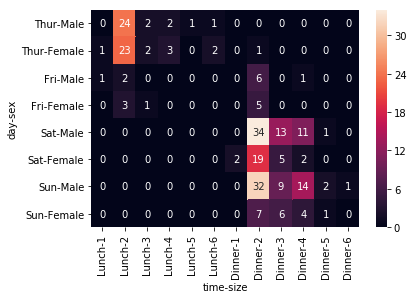

In [52]:
sns.heatmap(plot1,annot=True)

In [54]:
#highlights the higher values for a particular day
orange=sns.light_palette("red",as_cmap=True)
plot1.style.background_gradient(cmap=orange)